In [1]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Imports

In [2]:
import pandas as pd

##Loading the Data

In [3]:
train_path = "/content/drive/MyDrive/NLP Project/Data/T1_Text_Summarization_English/T1_Text_Summarization_English_train.csv"
test_path = "/content/drive/MyDrive/NLP Project/Data/T1_Text_Summarization_English/T1_Text_Summarization_English_test.csv"

In [4]:
train_df = pd.read_csv(train_path)
test_df = pd.read_csv(test_path)


In [5]:
train_df.head()

,Heading,Summary,Article,id
0,India opposes China's Belt and Road Initiative...,The name of all member countries except India ...,"At SCO, India refuses to back China's Belt and...",0
1,"UN urges for maximum restraint, invokes Simla ...","Pakistan termed the Indian action as ""unilater...","UN chief invokes Shimla Agreement, calls for '...",1
2,"China, Pak to finalise deal to develop SEZ und...","""The agreement will be finalised between Khybe...","China, Pak to finalise deal to develop SEZ und...",2
3,"Covaxin effectively neutralises both Alpha, De...",The top health research institute said that an...,"Covaxin effectively neutralises both Alpha, De...",3
4,"Top White House officials buried CDC report, r...",The decision to shelve detailed advice from th...,"In this April 22, 2020, file photo President D...",4


In [6]:
test_df.head() # so we cannot use test df in traditional sense i.e to get the test accuracy since no gold summar. Only human evaluation is possible on test set

,Heading,Article,id
0,EXPLAINER: How worrying is the variant first s...,How worrying is the variant first seen in Indi...,0
1,Pakistan Parliament to elect new prime ministe...,Pakistan’s National Assembly will elect a new ...,1
2,Indian-origin pathologist accused of botching ...,Dr. Khalid AhmedAn Indian-origin pathologist h...,2
3,China begins world's biggest census drive to c...,China begins world's biggest census drive to c...,3
4,"Indonesia prison fire kills 41 drug inmates, i...","Indonesia prison fire kills 41 drug inmates, i...",4


In [7]:
train_df["Summary"][0]

"The name of all member countries except India figured in the paragraph of the joint declaration endorsing Beijing's multi-billion dollar project."

In [8]:
temp = list()

temp.append(train_df["Article"][0])
temp

['At SCO, India refuses to back China\'s Belt and Road projectIndia on Sunday refused to back\xa0China\'s ambitious Belt and Road Initiative\xa0at the SCO\xa0Summit with\xa0Prime Minister\xa0Narendra\xa0Modi\xa0asserting that any mega connectivity project must respect sovereignty and territorial integrity of the countries. India was the only country in the eight-nation Shanghai Cooperation\xa0Organisation\xa0grouping to oppose the BRI\xa0project by China.\xa0A declaration signed by leaders of the Shanghai Cooperation Organisation (SCO) countries, including Modi, at the end of a two-day summit of the bloc said Russia, Pakistan, Kazakhstan, Uzbekistan, Kyrgyzstan and Tajikistan have been "reaffirming" their support for China\'s Belt and Road Initiative (BRI).Related Stories SCO Summit: President Xi accepts PM Modi\'s invitation for informal summit in India in 2019 PM Modi at SCO Summit 2018: \'Connectivity with neighbourhood and in SCO region India’s priority\'PM Modi, Pak Pres Hussain s

# Clean the data

In [12]:
import re

# Remove non-alphabetic characters (Data Cleaning)
def text_strip(column):

    for row in column:
      row = re.sub('<\s*script[^>]*>.*?<\s*/\s*script\s*>',"",row)

      
      row = re.sub("(\\t)", " ", str(row)).lower()
      row = re.sub("(\\r)", " ", str(row)).lower()
      row = re.sub("(\\n)", " ", str(row)).lower()

      # Remove _ if it occurs more than one time consecutively
      row = re.sub("(__+)", " ", str(row)).lower()

      # Remove - if it occurs more than one time consecutively
      row = re.sub("(--+)", " ", str(row)).lower()

      # Remove ~ if it occurs more than one time consecutively
      row = re.sub("(~~+)", " ", str(row)).lower()

      # Remove + if it occurs more than one time consecutively
      row = re.sub("(\+\++)", " ", str(row)).lower()

      #remove slashes
      row = re.sub(r"\\", "", str(row)).lower()

      #remove apostrophe
      row = re.sub("'","", str(row)).lower()

      # Remove the characters - <>()|&©ø"',;?~*!
      row = re.sub(r"[<>()|&©ø\[\]\'\"~*]", " ", str(row)).lower()

      # Remove mailto:
      row = re.sub("(mailto:)", " ", str(row)).lower()

      # Remove \x9* in text
      row = re.sub(r"(\\x9\d)", " ", str(row)).lower()

      #remove unicode space symbols
      row = re.sub(r'\\xa0', r' ', str(row)).lower()

      # Replace INC nums to INC_NUM
      row = re.sub("([iI][nN][cC]\d+)", "INC_NUM", str(row)).lower()

      # Replace CM# and CHG# to CM_NUM
      row = re.sub("([cC][mM]\d+)|([cC][hH][gG]\d+)", "CM_NUM", str(row)).lower()

      # Replace any url to only the domain name
      try:
          url = re.search(r"((https*:\/*)([^\/\s]+))(.[^\s]+)", str(row))
          repl_url = url.group(3)
          row = re.sub(r"((https*:\/*)([^\/\s]+))(.[^\s]+)", repl_url, str(row))
      except:
          pass

      # Remove multiple spaces
      row = re.sub("(\s+)", " ", str(row)).lower()

      # Remove the single character hanging between any two spaces
      row = re.sub("(\s+.\s+)", " ", str(row)).lower()
      




      yield row

In [10]:
processed_text = text_strip(train_df['Article'])
processed_summary = text_strip(train_df['Summary'])

#####Load the data as batches using the pipe() method provided by spaCy. This ensures that all pieces of text and summaries possess the string data type.

In [11]:
import spacy
from time import time

nlp = spacy.load("en_core_web_sm", disable=['ner', 'parser']) 

# Process text as batches and yield Doc objects in order
text = [str(doc) for doc in nlp.pipe(processed_text, batch_size=256)]

summary = ['_START_ '+ str(doc) + ' _END_' for doc in nlp.pipe(processed_summary, batch_size=256)]

KeyboardInterrupt: ignored

In [ ]:
train_df['cleaned_text'] = pd.Series(text)
train_df['cleaned_summary'] = pd.Series(summary)

In [ ]:
temp = list()

temp.append(text[0])
temp

In [ ]:
summary[0]

## Splitting the train data into valid (80:20)

In [ ]:
from sklearn.model_selection import train_test_split

train_df, valid_df = train_test_split(train_df, test_size=0.2)

In [ ]:
import os

In [ ]:
PATH_TO_SAVE = "/content/drive/MyDrive/NLP Project/Data/Preproceseed"

train_df.to_csv(os.path.join(PATH_TO_SAVE,"Train"))

In [ ]:

valid_df.to_csv(os.path.join(PATH_TO_SAVE,"VAL"))

#### Processing Test Data

In [ ]:
import os

In [ ]:
test_df = pd.read_csv(test_path)

In [ ]:
processed_text_test = text_strip(test_df['Article'])

In [ ]:
# Process text as batches and yield Doc objects in order
text_test = [str(doc) for doc in nlp.pipe(processed_text_test, batch_size=256)]

In [ ]:
test_df["cleaned_text"] = pd.Series(text_test)
test_df.to_csv(os.path.join(PATH_TO_SAVE,"Test"))

#Analysis

In [ ]:
train_df = pd.read_csv("/content/drive/MyDrive/NLP Project/Data/Preproceseed/Train")
test_df = pd.read_csv("/content/drive/MyDrive/NLP Project/Data/Preproceseed/Test")
val_df = pd.read_csv("/content/drive/MyDrive/NLP Project/Data/Preproceseed/VAL")

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8041 entries, 0 to 8040
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Unnamed: 0       8041 non-null   int64 
 1   Heading          8041 non-null   object
 2   Summary          8041 non-null   object
 3   Article          8041 non-null   object
 4   id               8041 non-null   int64 
 5   cleaned_text     8041 non-null   object
 6   cleaned_summary  8041 non-null   object
dtypes: int64(2), object(5)
memory usage: 439.9+ KB


In [ ]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2513 entries, 0 to 2512
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0    2513 non-null   int64 
 1   Heading       2513 non-null   object
 2   Article       2513 non-null   object
 3   id            2513 non-null   int64 
 4   cleaned_text  2513 non-null   object
dtypes: int64(2), object(3)
memory usage: 98.3+ KB


In [ ]:
val_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2011 entries, 0 to 2010
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Unnamed: 0       2011 non-null   int64 
 1   Heading          2011 non-null   object
 2   Summary          2011 non-null   object
 3   Article          2011 non-null   object
 4   id               2011 non-null   int64 
 5   cleaned_text     2011 non-null   object
 6   cleaned_summary  2011 non-null   object
dtypes: int64(2), object(5)
memory usage: 110.1+ KB


In [ ]:
train_df

,Unnamed: 0,Heading,Summary,Article,id,cleaned_text,cleaned_summary
0,7705,US President Joe Biden signs bills on forced l...,The measure had to overcome some initial hesit...,"Joe Biden signs the ""Accelerating Access to Cr...",7705,joe biden signs the accelerating access to cri...,_START_ the measure had to overcome some initi...
1,2735,Deadly Dubai bus accident: Omani driver senten...,"The Omani bus driver, who rammed the vehicle i...",Deadly Dubai bus accident: Omani driver senten...,2735,deadly dubai bus accident omani driver sentenc...,_START_ the omani bus driver who rammed the ve...
2,3166,Trump tweet may doom House Republicans' effort...,"Trump likely put the nail in the coffin, telli...",Donald TrumpUS President Donald Trump may have...,3166,donald trumpus president donald trump may have...,_START_ trump likely put the nail in the coffi...
3,9425,"128 nations, including India, defy Trump’s thr...",The UNGA on Thursday adopted by a decisive vot...,The United Nations General Assembly on Thursda...,9425,the united nations general assembly on thursda...,_START_ the unga on thursday adopted by decisi...
4,7420,Indian Embassy in Washington starts free Hindi...,The Indian embassy in Washington has started f...,Indian Embassy in Washington starts free Hindi...,7420,indian embassy in washington starts free hindi...,_START_ the indian embassy in washington has s...
...,...,...,...,...,...,...,...
8036,430,PM Narendra Modi arrives in Japan; tweets ‘vis...,"Before departing for Japan, in a statement on ...",PM Narendra Modi arrives in JapanPrime Ministe...,430,pm narendra modi arrives in japanprime ministe...,_START_ before departing for japan in statemen...
8037,3488,Russia-Ukraine news: United Nations gives $20 ...,Secy-General Antonio Guterres made the announc...,UN Secy-General Antonio Guterres speaks to mem...,3488,un secy-general antonio guterres speaks to mem...,_START_ secy-general antonio guterres made the...
8038,751,Ensure no Pak territory is used to launch terr...,The India-US joint statement sent out a stern ...,Ensure no Pak territory is used to launch terr...,751,ensure no pak territory is used to launch terr...,_START_ the india-us joint statement sent out ...
8039,4449,Nawaz Sharif was a 'selected' prime minister: ...,Pakistan Peoples Party (PPP) chairman Bilawal ...,Sharif was a 'selected' prime minister: Bilawa...,4449,sharif was selected prime minister bilawalpaki...,_START_ pakistan peoples party ppp chairman bi...


### Plot a graph to determine the frequency ranges tied to the lengths of text and summary, i.e., determine the range of length of words where the maximum number of texts and summaries fall into.



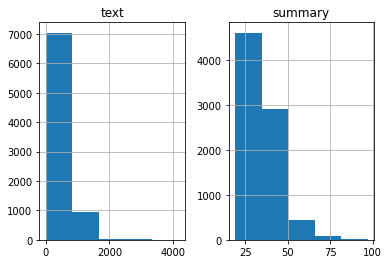

In [ ]:
import matplotlib.pyplot as plt

text_count = []
summary_count = []

for sent in train_df['cleaned_text']:
    text_count.append(len(sent.split()))
    
for sent in train_df['cleaned_summary']:
    summary_count.append(len(sent.split()))

graph_df = pd.DataFrame() 

graph_df['text'] = text_count
graph_df['summary'] = summary_count

graph_df.hist(bins = 5)
plt.show()

In [ ]:
# Model to summarize the text between 0-2000 words for Summary and 0-50 words for Text
max_text_len = 1500
max_summary_len = 95

## Selecting source and summary that fall within the range

In [ ]:

import numpy as np

cleaned_text = np.array(train_df['cleaned_text'])
cleaned_summary= np.array(train_df['cleaned_summary'])

short_text = []
short_summary = []

for i in range(len(cleaned_text)):
    if len(cleaned_summary[i].split()) <= max_summary_len and len(cleaned_text[i].split()) <= max_text_len:
        short_text.append(cleaned_text[i])
        short_summary.append(cleaned_summary[i])
        
post_pre = pd.DataFrame({'text': short_text,'summary': short_summary})

post_pre.head(2)

,text,summary
0,joe biden signs the accelerating access to cri...,_START_ the measure had to overcome some initi...
1,deadly dubai bus accident omani driver sentenc...,_START_ the omani bus driver who rammed the ve...


# Doubts

Should we make evverything small case? It loses some info . For Ex: An abbreviation like SCO becomes sco and projectIndia becomes projectindia